In [1]:
using DynamicalSystems
using Plots
using Peaks
using LaTeXStrings

## 1. Lorenz Map



Consider the Lorenz system given by the following system of ODEs:
$$
\dot{x} = \sigma (y - x) \\
\dot{y} = x (\rho - z) - y \\
\dot{z} = xy - \beta z
$$

Consider its chaotic regime by choosing $\sigma = 10$, $\beta = \frac{8}{3}$, and $\rho = 28$.

1. Choose a reasonable initial condition and draw a trajectory of the system. Visualize 3D state space. The trajectory should be long enough such that you can identify the butterfly-shaped chaotic attractor.

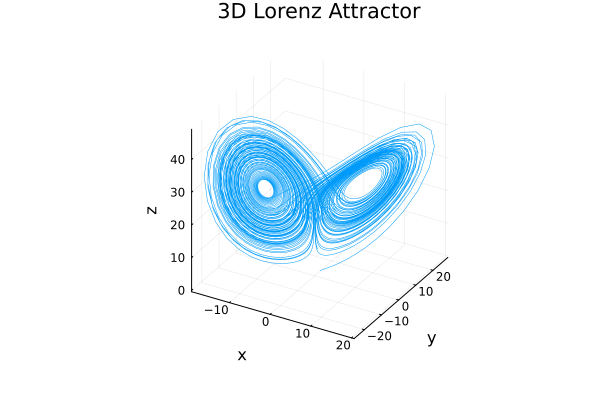

In [2]:
# Define the Lorenz system
function lorenz_rule!(du, u, p, t)
    σ, ρ, β = p
    x, y, z = u
    du[1] = σ * (y - x)
    du[2] = x * (ρ - z) - y
    du[3] = x * y - β * z
end

# Parameters and initial conditions
σ = 10.0
β = 8 / 3
ρ = 28.0
p = (σ, ρ, β)
u0 = [1.0, 1.0, 1.0]

# Define the ContinuousDynamicalSystem
ds = ContinuousDynamicalSystem(lorenz_rule!, u0, p)

# Plot the trajectory
total_time = 100.0
sampling_time = 0.02
Y, t = trajectory(ds, total_time; Δt=sampling_time)
x, y, z = Y[:, 1], Y[:, 2], Y[:, 3]
plot3d(x, y, z, lw=0.5, title="3D Lorenz Attractor", xlabel="x", ylabel="y", zlabel="z", legend=false)

2. Edward Lorenz used consecutive maxima of the $z$ coordinate to quantify the chaotic nature of the system. Plot the time trace of the $z$ coordinate of the trajectory drawn before. Find all consecutive maxima of the $z$ coordinate, $\{z_n\}$, and plot the first-order return plot of the resulting series of peaks. Overlay the bisectrix. Confirm for yourself by inspection of the return plot, that $\forall n : |F'(z_n)| > 1$.

   **Hint:** To find the peaks of the signal, you can use `Peaks.jl` in Julia or `scipy.signal.find_peaks` in Python.

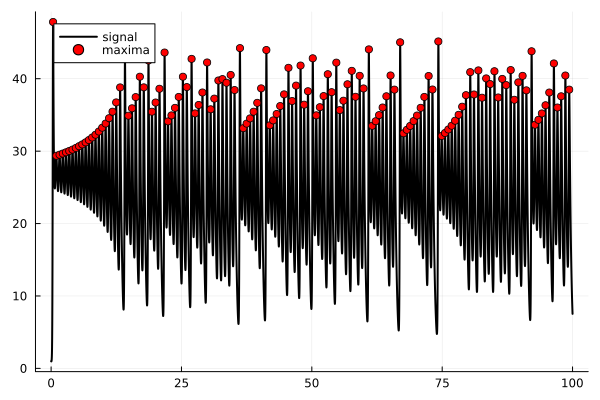

In [3]:
# Find peaks
indices, zn = findmaxima(z)
tn = t[indices]

# Plot peaks
plotpeaks(t, z; peaks=indices)

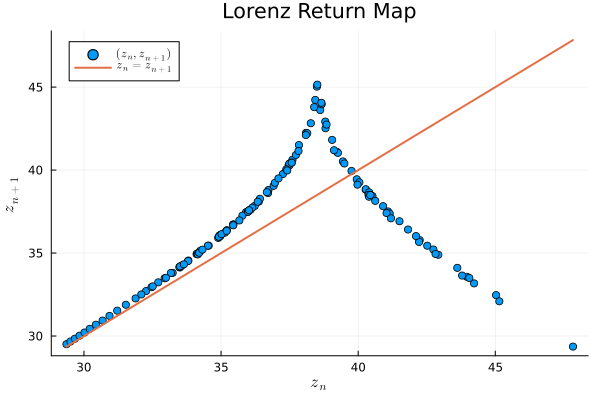

In [4]:
# Plot return map
scatter(zn[1:end-1], zn[2:end], xlabel=L"z_{n}", ylabel=L"z_{n+1}", label=L"(z_{n}, z_{n+1})", title="Lorenz Return Map")
plot!([minimum(zn), maximum(zn)], [minimum(zn), maximum(zn)], lw=2, label=L"z_{n}=z_{n+1}")

From the return plot, it is visually evident that all points deviate significantly from the bisectrix $z_n = z_{n+1}$, indicating that the slope $|F'(z_n)| > 1$ for all $n$. This deviation reflects the system's chaotic nature and confirms that the Lorenz map's closed orbits are unstable.

3. Now, given the Lorenz map $z_{n+1} = F(z_n)$ and assuming $|F'(z_n)| > 1 \ \forall n$, show that all closed orbits of $F$ are unstable.

   **Hint:** Consider the fate of a small perturbation $\epsilon_n$ at step $n$ under repeated application of $F$, and recall, that for a $k$-cycle we need to have $z_{n+k} = z_n$.


Suppose $z_n$ is a point on a $k$-cycle of the map $F$, meaning $z_{n+k} = z_n$. Consider a small perturbation $\epsilon_n$ added to $z_n$ at step $n$. The perturbed value becomes: $z_n + \epsilon_n$.

When applying the map $F$, the perturbation $\epsilon_n$ evolves as follows:
$$
z_{n+1} = F(z_n + \epsilon_n) \approx F(z_n) + F'(z_n) \epsilon_n.
$$

Thus, the perturbation evolves as $\epsilon_{n+1} = F'(z_n) \epsilon_n$. After $k$ iterations, the total evolution of the perturbation is given by:
$$
\epsilon_{n+k} = \prod_{i=0}^{k-1} F'(z_{n+i}) \epsilon_n
$$
Using the assumption $|F'(z_n)| > 1 \ \forall n$, each term in the product $|F'(z_{n+i})|$ is greater than 1. Hence:
$$
\left| \prod_{i=0}^{k-1} F'(z_{n+i}) \right| > 1,
$$
which means: $|\epsilon_{n+k}| > |\epsilon_n|$. Therefore, the perturbation grows exponentially over time, rather than decaying.

For a $k$-cycle to be stable, the perturbation $\epsilon_n$ must decay after $k$ iterations, i.e., $|\epsilon_{n+k}| < |\epsilon_n|$. However, since $|\epsilon_{n+k}| > |\epsilon_n|$ under the given assumption, all $k$-cycles are unstable.

## 2. Strange Attractors, Fractal Dimensions and Chaos

Visit [https://www.dynamicmath.xyz/strange-attractors/](https://www.dynamicmath.xyz/strange-attractors/) and pick any chaotic attractor under "Interactive Simulations" you feel attracted to! If you click on one of the systems, you will be led to an interactive session demonstrating the dynamics of the attractor. In this exercise, you will determine its correlation dimension and empirically estimate its maximum Lyapunov exponent.


1. Define a `ContinuousDynamicalSystem` that implements the system equation of your system of choice. The library provides an example for the Lorenz model. You do **not** need to implement the Jacobian!

In [5]:
# Define the Sprott system
function sprott_rule!(du, u, p, t)
    a, b = p
    x, y, z = u
    du[1] = y + a * x * y + x * z
    du[2] = 1 - b * x^2 + y * z
    du[3] = x - x^2 - y^2
end

# Parameters and initial conditions
a = 2.07
b = 1.79
p = (a, b)
u0 = [0.63, 0.47, -0.54]

# Define the ContinuousDynamicalSystem
ds = ContinuousDynamicalSystem(sprott_rule!, u0, p)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  sprott_rule!
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    (2.07, 1.79)
 time:          0.0
 state:         [0.63, 0.47, -0.54]


2. Draw a trajectory from your system and plot the attractor in state space. Make sure that you implemented the system correctly by visually comparing the attractor to the one shown on the web page.

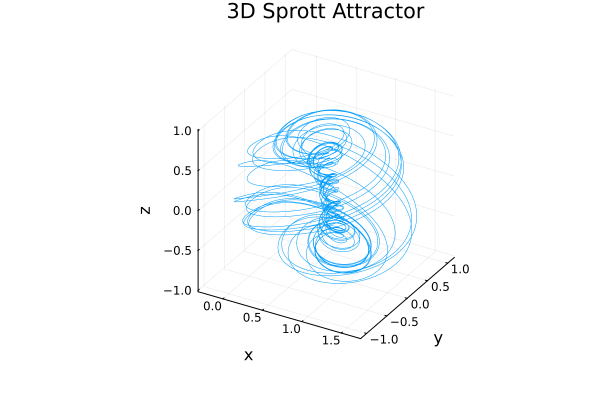

In [6]:
# Plot the trajectory
total_time = 200.0
sampling_time = 0.02
Y, t = trajectory(ds, total_time; Δt=sampling_time)
x, y, z = Y[:, 1], Y[:, 2], Y[:, 3]
plot3d(x, y, z, lw=0.5, title="3D Sprott Attractor", xlabel="x", ylabel="y", zlabel="z", legend=false)

3. In the lecture, you learned that the correlation dimension $d_{\text{corr}}$ can be used to compute the fractal dimension of the attractor. Compute the correlation sum $C(\epsilon)$ for a suitable range of small radii $\epsilon$ and plot $\epsilon$ against $C(\epsilon)$ in log-log fashion. You should see a linear relationship.  
   **Hint:** Use the function `correlationsum`.

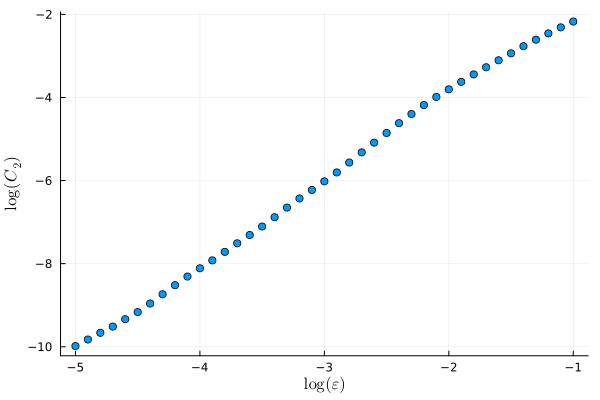

In [7]:
# Compute the correlation sum 
ες = 2 .^ (-5:0.1:-1)
Cs = correlationsum(Y, ες; show_progress = false)

# Plot in log-log scale
xs = log2.(ες)
ys = log2.(Cs)
scatter(xs, ys; ylabel = L"\log(C_2)", xlabel = L"\log (\epsilon)", legend=false)

4. Determine $d_{\text{corr}}$ by fitting a line to the linear region of the log-log plot. Is the attractor you picked indeed "strange"?  
   **Hint:** Use `linear_region` to fit the line.

In [8]:
# Fit a linear region
lrs, slope = linear_regions(xs, ys, tol = 0.5)

println("Correlation Dimension d_corr = ", slope[1])

Correlation Dimension d_corr = 2.054749498312221


The correlation dimension $d_{\text{corr}}$ is a non-integer value. This indicates that the attractor has fractal properties and confirms that it is indeed a "strange attractor." The fractional value of $d_{\text{corr}}$ suggests a complex geometric structure that is characteristic of chaotic systems.

5. There are strange attractors that do not display chaos (i.e., fractal dimension but no sensitive dependency on initial conditions). Determine the maximum Lyapunov exponent of the system running into the strange attractor. Does the attractor indeed display deterministic chaos?  
   **Hint:** Use the `lyapunov` function.

In [9]:
# Compute maximum Lyapunov exponent
λ = lyapunov(ds, 10000; d0 = 1e-7, d0_upper = 1e-4, Ttr = 100)

println("Maximum Lyapunov Exponent = ", λ)

Maximum Lyapunov Exponent = 0.013158283711506482


The maximum Lyapunov exponent ($ \lambda $) is a positive value. This indicates that the attractor exhibits sensitive dependence on initial conditions, a hallmark of deterministic chaos. 

Thus, the attractor not only has a fractal dimension but also displays deterministic chaos, confirming its chaotic nature.